In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
%matplotlib inline 

In [2]:
# load points cloud

f = open('data/final_project_point_cloud.fuse', 'r')

data = []

for l in f:
    ls = l.split(" ")
    data.append([float(ls[0]), float(ls[1]), float(ls[2]), float(ls[3][:-1])])
    
f.close()
data = np.array(data)
xs, ys, zs, i = data.T

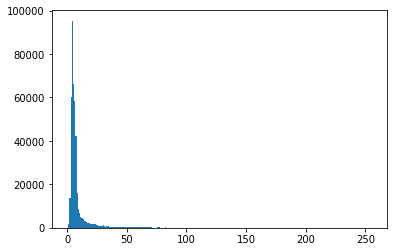

In [3]:
# analysis points

plt.hist(i, 255)
plt.show()
# intensity
si = sorted(i)[int(0.996*len(i)):int(0.9995*len(i))]

## As we saw on the plot, most points are the road point and with relativly low intensity.
## The points with high intensity are the lane mark, because they are made by high reflection.

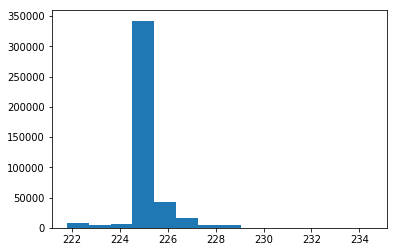

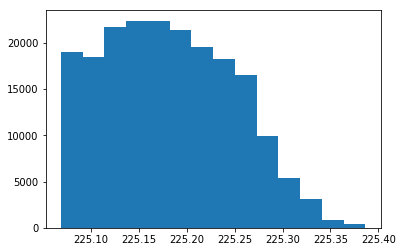

In [4]:
plt.hist(zs, 14)
plt.show()
# height
zrange = max(zs) - min(zs)
mi = np.median(zs) - 0.005 * zrange
mx = np.median(zs) + 0.02 * zrange
road_data = []
for d in data:
    if d[2] >= mi and d[2] <= mx:
        road_data.append(d)
road_data = np.array(road_data)
rx, ry, rz, ri = road_data.T
plt.hist(rz, 14)
plt.show()

## Similarly, then most point are on the road level.

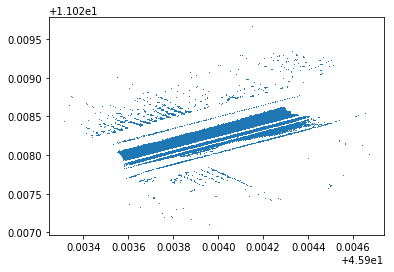

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
plt.show()

## All point on road level.

75.0 101.0


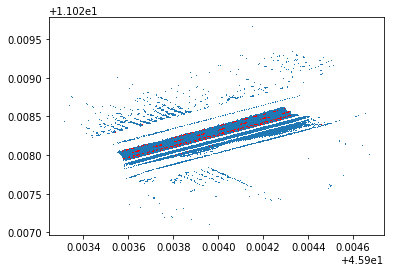

In [6]:
lane_data = []
mini = min(si)
maxi = max(si)
print("{} {}".format(mini, maxi))
for d in road_data:
    if d[3] >= mini and d[3] <= maxi:
        lane_data.append(d[:-1])

lane_data = np.array(lane_data)
lx, ly, lz = lane_data.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rx, ry, ',')
ax.plot(lx, ly, ',', color='red')
plt.show()

## Road with lane mark.

In [7]:
# separate 3 lanes
kmeans = KMeans(max_iter=500000,n_clusters=3).fit(lane_data)
label = kmeans.labels_

data1 = []
data2 = []
data3 = []
data7 = []
for i in range(len(label)):
    if label[i] == 0:
        data1.append([lane_data[i][0],lane_data[i][1],lane_data[i][2]])
    elif label[i] == 1:
        data2.append([lane_data[i][0],lane_data[i][1],lane_data[i][2]])
    elif label[i] == 2:
        data3.append([lane_data[i][0],lane_data[i][1],lane_data[i][2]])
    else:
        data7.append([x_new[i][0],x_new[i][1],x_new[i][2]])

data1 = np.asarray(data1)
data2 = np.asarray(data2)
data3 = np.asarray(data3)

if(len(data1)!=0):
    rx1, ry1, rz1 = data1.T
if(len(data2)!=0):
    rx2, ry2, rz2 = data2.T
if(len(data3)!=0):
    rx3, ry3, rz3 = data3.T
    
X_1 = data1[:,0][:, np.newaxis]
y_1 = data1[:,1]

X_2 = data2[:,0][:, np.newaxis]
y_2 = data2[:,1]

X_3 = data3[:,0][:, np.newaxis]
y_3 = data3[:,1]

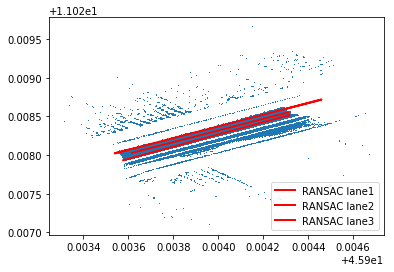

In [8]:
# use ransac to fit lanes

# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X_1, y_1)

model_2 = linear_model.LinearRegression()
model_2.fit(X_2, y_2)

model_3 = linear_model.LinearRegression()
model_3.fit(X_3, y_3)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X_1, y_1)

model_ransac_2 = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac_2.fit(X_2, y_2)

model_ransac_3 = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac_3.fit(X_3, y_3)

inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

inlier_mask_2 = model_ransac_2.inlier_mask_
outlier_mask_2 = np.logical_not(inlier_mask_2)

inlier_mask_3 = model_ransac_3.inlier_mask_
outlier_mask_3 = np.logical_not(inlier_mask_3)

# Predict data of estimated models
line_X = X_1
line_y = model.predict(X_1)
line_y_ransac = model_ransac.predict(X_1)

line_X_2 = X_2
line_y_2 = model_2.predict(X_2)
line_y_ransac_2 = model_ransac_2.predict(X_2)

line_X_3 = X_3
line_y_3 = model_3.predict(X_3)
line_y_ransac_3 = model_ransac_3.predict(X_3)



plt.plot(rx, ry, ',')

lw = 2
plt.plot(line_X, line_y_ransac, color='red', linestyle='-', linewidth=lw, label='RANSAC lane1')
plt.plot(line_X_2, line_y_ransac_2, color='red', linestyle='-',linewidth=lw, label='RANSAC lane2')
plt.plot(line_X_3, line_y_ransac_3, color='red', linestyle='-',linewidth=lw, label='RANSAC lane3')

plt.legend(loc='lower right')
plt.show()

## Lane marks with lines fitted.